In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

NWS_Oct14 = pd.read_csv('NWSstation_Oct14.csv')
NWS_Nov2 = pd.read_csv('NWSstation_Nov2.csv')
NWS_Nov3 = pd.read_csv('NWSstation_Nov3.csv')
NWS_Nov4 = pd.read_csv('NWSstation_Nov4.csv')
NWS_Nov10 = pd.read_csv('NWSstation_Nov10.csv')

In [2]:
NWS14_wd = NWS_Oct14['WindDirectionDegrees']
NWS14_ws = NWS_Oct14['WindSpeedMPH']
NWS2_wd = NWS_Nov2['WindDirectionDegrees']
NWS2_ws = NWS_Nov2['WindSpeedMPH']
NWS3_wd = NWS_Nov3['WindDirectionDegrees']
NWS3_ws = NWS_Nov3['WindSpeedMPH']
NWS4_wd = NWS_Nov4['WindDirectionDegrees']
NWS4_ws = NWS_Nov4['WindSpeedMPH']
NWS10_wd = NWS_Nov10['WindDirectionDegrees']
NWS10_ws = NWS_Nov10['WindSpeedMPH']

In [3]:
from windrose_GM import WindroseAxes
import matplotlib.cm as cm

def WindRose(wd,ws):
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=0.9, edgecolor='white')
    ax.legend((0,1), fontsize=11, title='Wind Speed (mph)')
    
    ax.bar(wd, ws, normed=True, nsector=16, edgecolor='white')
    table = ax._info['table']
    wd_freq = np.sum(table, axis=0)
    return wd_freq

def WindHist(wd_freq):
    fig = plt.figure(figsize=(8,4))
    plt.bar(np.arange(16), wd_freq, align='center')
    ax = plt.gca()
    xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
    xticks=np.arange(16)
    ax.set_ylabel('Frequency of Wind Direction')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels);

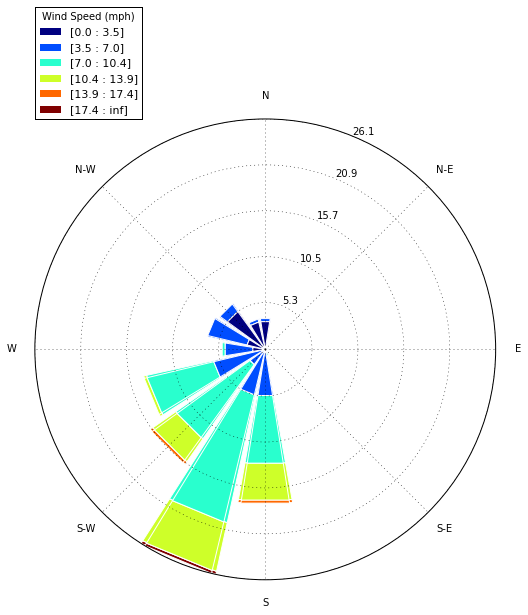

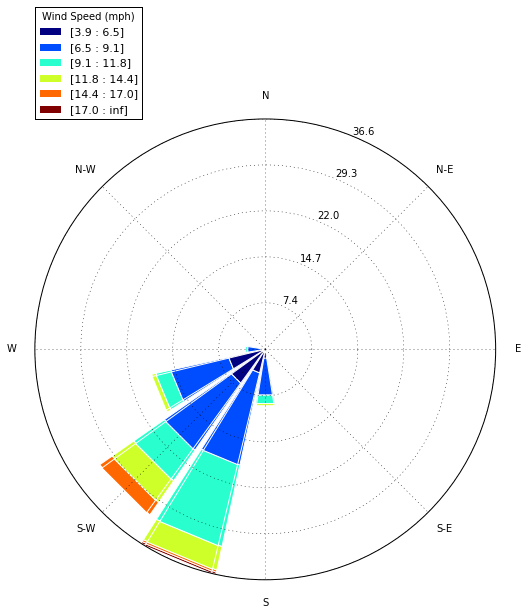

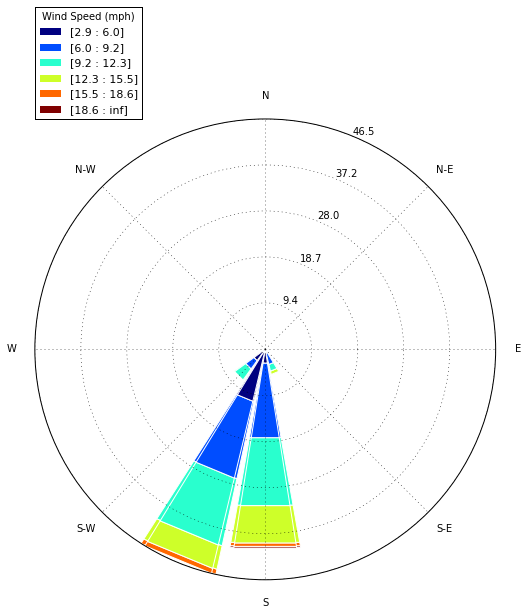

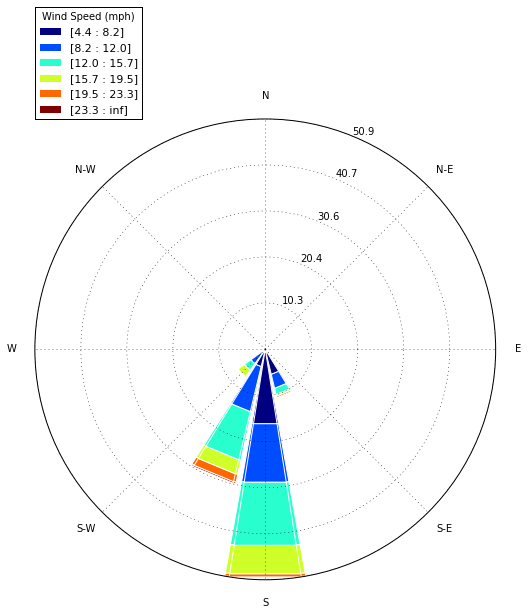

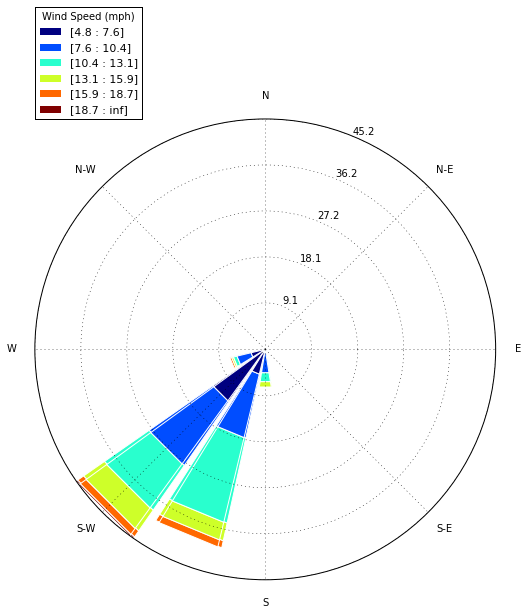

In [4]:
fNWS14 = WindRose(NWS14_wd,NWS14_ws);
fNWS2 = WindRose(NWS2_wd,NWS2_ws);
fNWS3 = WindRose(NWS3_wd,NWS3_ws);
fNWS4 = WindRose(NWS4_wd,NWS4_ws);
fNWS10 = WindRose(NWS10_wd,NWS10_ws);

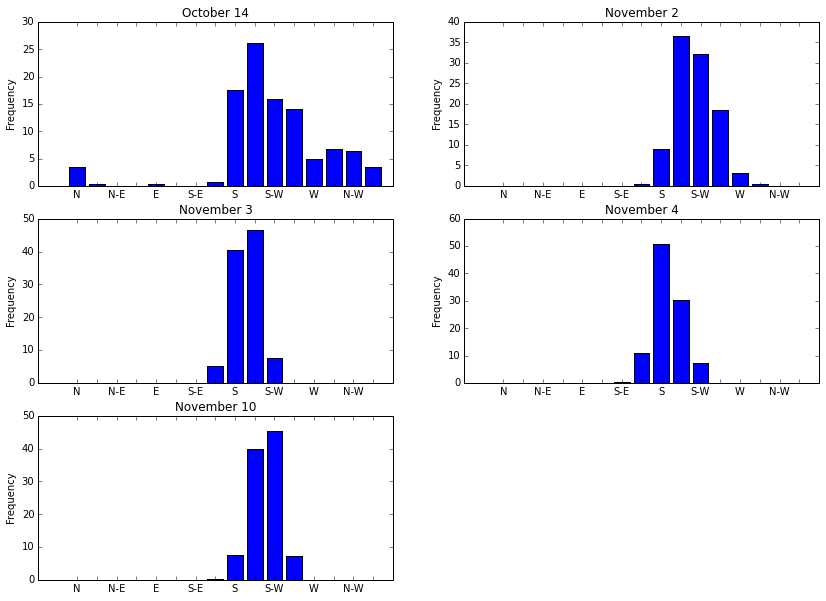

In [30]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(321)
plt.bar(np.arange(16), fNWS14, align='center')
ax1 = plt.gca()
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
ax1.set_ylabel('Frequency')
ax1.set_title('October 14')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels);

ax2 = fig.add_subplot(322)
plt.bar(np.arange(16), fNWS2, align='center')
ax2.set_ylabel('Frequency')
ax2.set_title('November 2')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabels);

ax3 = fig.add_subplot(323)
plt.bar(np.arange(16), fNWS3, align='center')
ax3.set_ylabel('Frequency')
ax3.set_title('November 3')
ax3.set_xticks(xticks)
ax3.set_xticklabels(xlabels);

ax4 = fig.add_subplot(324)
plt.bar(np.arange(16), fNWS4, align='center')
ax4.set_ylabel('Frequency')
ax4.set_title('November 4')
ax4.set_xticks(xticks)
ax4.set_xticklabels(xlabels);

ax5 = fig.add_subplot(325)
plt.bar(np.arange(16), fNWS10, align='center')
ax5.set_ylabel('Frequency')
ax5.set_title('November 10')
ax5.set_xticks(xticks)
ax5.set_xticklabels(xlabels);

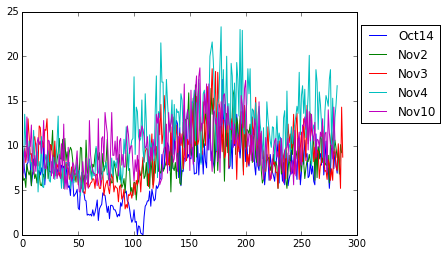

In [21]:
plt.plot(NWS14_ws,label='Oct14')
plt.plot(NWS2_ws,label='Nov2')
plt.plot(NWS3_ws,label='Nov3')
plt.plot(NWS4_ws,label='Nov4')
plt.plot(NWS10_ws,label='Nov10')
plt.legend(loc=(1.01,0.5))

In [28]:
#http://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
 
    """Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
    the values of the time history of the signal.
    window_size : int
    the length of the window. Must be an odd integer number.
    order : int
    the order of the polynomial used in the filtering.
    Must be less then `window_size` - 1.
    deriv: int
    the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
    the smoothed signal (or it's n-th derivative).
      22     Notes
      23     -----
      24     The Savitzky-Golay is a type of low-pass filter, particularly
      25     suited for smoothing noisy data. The main idea behind this
      26     approach is to make for each point a least-square fit with a
      27     polynomial of high order over a odd-sized window centered at
      28     the point.
      29     Examples
      30     --------
      31     t = np.linspace(-4, 4, 500)
      32     y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
      33     ysg = savitzky_golay(y, window_size=31, order=4)
      34     import matplotlib.pyplot as plt
      35     plt.plot(t, y, label='Noisy signal')
      36     plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
      37     plt.plot(t, ysg, 'r', label='Filtered signal')
      38     plt.legend()
      39     plt.show()
      40     References
      41     ----------
      42     .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
      43        Data by Simplified Least Squares Procedures. Analytical
      44        Chemistry, 1964, 36 (8), pp 1627-1639.
      45     .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
      46        W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
      47        Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

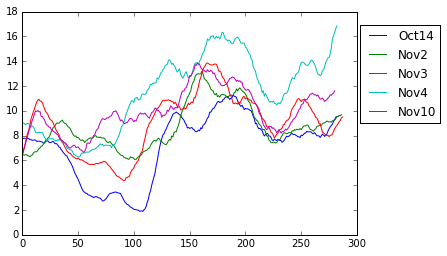

In [57]:
hat14 = savitzky_golay(np.array(NWS14_ws), 41, 3) # window size __, polynomial order __
hat2 = savitzky_golay(np.array(NWS2_ws), 41, 3)
hat3 = savitzky_golay(np.array(NWS3_ws), 41, 3)
hat4 = savitzky_golay(np.array(NWS4_ws), 41, 3)
hat10 = savitzky_golay(np.array(NWS10_ws), 41, 3)
plt.plot(hat14,label='Oct14')
plt.plot(hat2,label='Nov2')
plt.plot(hat3,label='Nov3')
plt.plot(hat4,label='Nov4')
plt.plot(hat10,label='Nov10')
plt.legend(loc=(1.01,0.5))

In [5]:
import datetime
import matplotlib.dates as mdates
Oct14time = NWS_Oct14['Time']
Oct14x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Oct14time]
Nov2time = NWS_Nov2['Time']
Nov2x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Nov2time]
Nov3time = NWS_Nov3['Time']
Nov3x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Nov3time]
Nov4time = NWS_Nov4['Time']
Nov4x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Nov4time]
Nov10time = NWS_Nov10['Time']
Nov10x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Nov10time]
xfmt = mdates.DateFormatter('%H')

In [9]:
def subplots(variablename,title,ylabel,ymin,ymax):
    ''' plots a specified variable for the five days in the Fall in subplots'''
    fig = plt.figure(figsize=(10,12))
    ax1 = fig.add_subplot(511)
    ax1.xaxis.set_major_formatter(xfmt)
    #ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
    ax1.plot(Oct14x,NWS_Oct14[variablename],label='Oct14',linewidth=2)
    ax1.set_title(title)
    ax1.set_ylim(ymin,ymax)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')

#     ax2 = fig.add_subplot(512)
#     ax2.xaxis.set_major_formatter(xfmt)
#     #ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
#     ax2.plot(Nov2x,NWS_Nov2[variablename],label='Nov2',c='r',linewidth=2)
#     ax2.set_ylim(ymin,ymax)
#     ax2.set_ylabel(ylabel)
#     ax2.legend(loc='upper left')

#     ax3 = fig.add_subplot(513)
#     ax3.xaxis.set_major_formatter(xfmt)
#     #ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
#     ax3.plot(Nov3x,NWS_Nov3[variablename],label='Nov3',c='g',linewidth=2)
#     ax3.set_ylim(ymin,ymax)
#     ax3.set_ylabel(ylabel)
#     ax3.legend(loc='upper left')

#     ax4 = fig.add_subplot(514)
#     ax4.xaxis.set_major_formatter(xfmt)
#     #ax4.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
#     ax4.plot(Nov4x,NWS_Nov4[variablename],label='Nov4',c='purple',linewidth=2)
#     ax4.set_ylim(ymin,ymax)
#     ax4.set_ylabel(ylabel)
#     ax4.legend(loc='upper left')

#     ax5 = fig.add_subplot(515)
#     ax5.xaxis_date()
#     ax5.xaxis.set_major_formatter(xfmt)
#     #ax5.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
#     ax5.plot(Nov10x,NWS_Nov10[variablename],label='Nov10',c='orange',linewidth=2)
#     ax5.set_ylim(ymin,ymax)
#     ax5.set_ylabel(ylabel)
#     ax5.legend(loc='upper left')

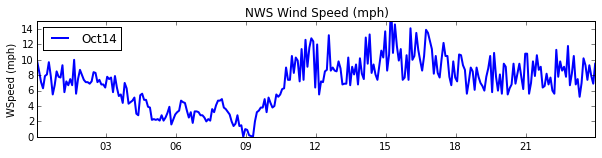

In [10]:
subplots('WindSpeedMPH','NWS Wind Speed (mph)','WSpeed (mph)',0,15)

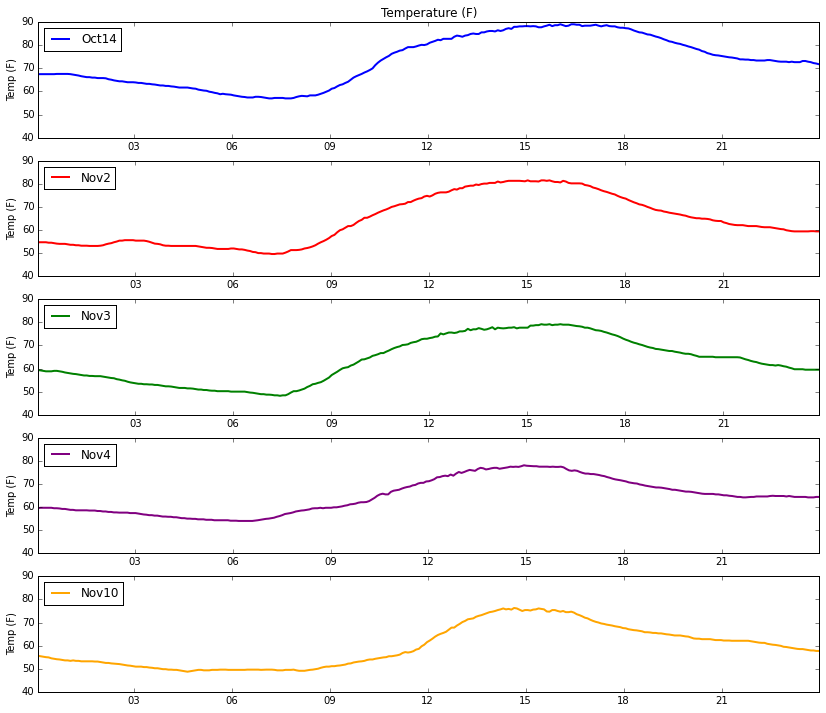

In [77]:
subplots('TemperatureF','Temperature (F)','Temp (F)',40,90)

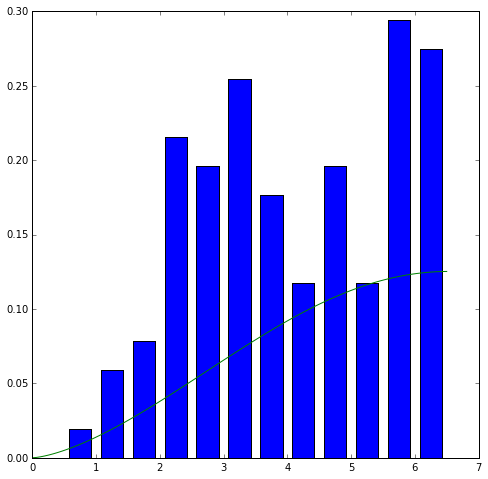

In [23]:
# probability density function
from windrose_GM import WindAxes
ax = WindAxes.from_ax()
# bins = np.arange(0, 6 + 1, 0.5)
# bins = bins[1:]
ax, params = ax.pdf(NWS14_ws, bins=bins)